## Задания

1. Используйте **наборы данных для классификации и регрессии**, с помощью которых вы выполняли ЛР1-ЛР4.
2. С помощью классов библиотеки sklearn выполните понижение размерности (**размерность выберите сами, можно разные**) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. **Выберите две модели** (одна - для регрессии и другая - для классификации).
4. Обучите выбранные модели с использованием данных в пространстве низкой размерности - **используйте результаты выполнения пункта 3** (не забудьте, что понижать нужно и X_train и X_test - проще всего понижать X). **Сделайте вывод** о том, какие методы понижения размерности лучше всего подходят для ваших данных.
5. **Самостоятельно реализуйте алгоритм PCA**. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). **Выполните визуализацию данных** (точки на плоскости).
6. Попробуйте выполнить **кластеризацию преобразованных в пункте 5 данных с помощью вашей реализации алгоритма KMeans** из ЛР6.
7. Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. **Важно: модель должна быть реализована вами, не sklearn!** Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, mean_absolute_percentage_error
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../data/preprocessing_moldova_cars_task.csv', delimiter=',')
df2 = pd.read_csv('../data/preprocessing_airlines_task.csv')

In [3]:
# df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
X1 = df1.drop(['Price(euro)'], axis=1)
y1 = df1['Price(euro)']
X2 = df2.drop(['Delay'], axis=1)
y2 = df2['Delay']

In [5]:
def test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    bag = BaggingClassifier().fit(X_train, y_train)
    print(classification_report(y_test, bag.predict(X_test)))

In [6]:
np.random.seed(42)

In [7]:
test(X2, y2)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     44806
           1       0.67      0.54      0.60     15194

    accuracy                           0.82     60000
   macro avg       0.76      0.73      0.74     60000
weighted avg       0.81      0.82      0.81     60000



In [8]:
X1.describe()

Make         Model          Year      Distance  \
count  41007.000000  41007.000000  41007.000000  4.100700e+04   
mean      51.936108    402.552003   2007.979152  4.571171e+05   
std       25.281975    234.070091      8.222605  4.451526e+06   
min        0.000000      0.000000   1900.000000  0.000000e+00   
25%       35.000000    186.000000   2004.000000  8.800000e+04   
50%       59.000000    386.000000   2009.000000  1.688620e+05   
75%       72.000000    598.000000   2014.000000  2.300000e+05   
max       86.000000    828.000000   2021.000000  1.000000e+08   

       Engine_capacity(cm3)  Style_Cabriolet   Style_Combi   Style_Coupe  \
count          41007.000000     41007.000000  41007.000000  41007.000000   
mean            1853.856732         0.004194      0.010315      0.019143   
std              700.364532         0.064629      0.101040      0.137029   
min                0.000000         0.000000      0.000000      0.000000   
25%             1500.000000         0.000000      0.000000      0.000000   
50%             1800.000000         0.000000      0.000000      0.000000   
75%             2000.000000         0.000000      0.000000      0.000000   
max             9999.000000         1.000000      1.000000      1.000000   

       Style_Crossover  Style_Hatchback  ...   Style_Sedan  Style_Universal  \
count     41007.000000     41007.000000  ...  41007.000000     41007.000000   
mean          0.126734         0.160387  ...      0.301900         0.179091   
std           0.332679         0.366969  ...      0.459088         0.383433   
min           0.000000         0.000000  ...      0.000000         0.000000   
25%           0.000000         0.000000  ...      0.000000         0.000000   
50%           0.000000         0.000000  ...      0.000000         0.000000   
75%           0.000000         0.000000  ...      1.000000         0.000000   
max           1.000000         1.000000  ...      1.000000         1.000000   

       Fuel_type_Diesel  Fuel_type_Electric  Fuel_type_Hybrid  \
count      41007.000000        41007.000000      41007.000000   
mean           0.460946            0.008267          0.053479   
std            0.498479            0.090547          0.224989   
min            0.000000            0.000000          0.000000   
25%            0.000000            0.000000          0.000000   
50%            0.000000            0.000000          0.000000   
75%            1.000000            0.000000          0.000000   
max            1.000000            1.000000          1.000000   

       Fuel_type_Metan/Propan  Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  \
count            41007.000000      41007.000000              41007.000000   
mean                 0.109542          0.354964                  0.012803   
std                  0.312322          0.478508                  0.112424   
min                  0.000000          0.000000                  0.000000   
25%                  0.000000          0.000000                  0.000000   
50%                  0.000000          0.000000                  0.000000   
75%                  0.000000          1.000000                  0.000000   
max                  1.000000          1.000000                  1.000000   

       Transmission_Automatic  Transmission_Manual  
count            41007.000000         41007.000000  
mean                 0.450947             0.549053  
std                  0.497594             0.497594  
min                  0.000000             0.000000  
25%                  0.000000             0.000000  
50%                  0.000000             1.000000  
75%                  1.000000             1.000000  
max                  1.000000             1.000000  

[8 rows x 25 columns]

In [9]:
X2.describe()

id         Flight    AirportFrom      AirportTo  \
count  400000.000000  400000.000000  400000.000000  400000.000000   
mean   287779.723357    2455.453042     143.484872     142.455925   
std    163738.931168    2078.725805      79.358422      79.268264   
min         1.000000       1.000000       0.000000       0.000000   
25%    139979.750000     710.000000      79.000000      79.000000   
50%    296098.500000    1848.000000     150.000000     148.000000   
75%    439381.250000    3793.250000     208.000000     208.000000   
max    539381.000000    7813.000000     292.000000     292.000000   

           DayOfWeek           Time         Length     Airline_9E  \
count  400000.000000  400000.000000  400000.000000  400000.000000   
mean        3.953024     787.657613     131.069739       0.039277   
std         1.844885     282.725426      69.327039       0.194255   
min         1.000000      10.000000       0.000000       0.000000   
25%         3.000000     540.000000      81.000000       0.000000   
50%         4.000000     775.000000     115.000000       0.000000   
75%         5.000000    1025.000000     160.000000       0.000000   
max         7.000000    1439.000000     655.000000       1.000000   

          Airline_AA     Airline_AS  ...     Airline_FL     Airline_HA  \
count  400000.000000  400000.000000  ...  400000.000000  400000.000000   
mean        0.088517       0.022740  ...       0.042647       0.011330   
std         0.284046       0.149074  ...       0.202061       0.105838   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

          Airline_MQ     Airline_OH     Airline_OO     Airline_UA  \
count  400000.000000  400000.000000  400000.000000  400000.000000   
mean        0.072890       0.026042       0.092158       0.055793   
std         0.259956       0.159262       0.289249       0.229521   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Airline_US     Airline_WN    Airline_XE     Airline_YV  
count  400000.000000  400000.000000  400000.00000  400000.000000  
mean        0.070140       0.142333       0.06136       0.029740  
std         0.255383       0.349391       0.23999       0.169869  
min         0.000000       0.000000       0.00000       0.000000  
25%         0.000000       0.000000       0.00000       0.000000  
50%         0.000000       0.000000       0.00000       0.000000  
75%         0.000000       0.000000       0.00000       0.000000  
max         1.000000       1.000000       1.00000       1.000000  

[8 rows x 25 columns]

In [10]:
vt = VarianceThreshold(2)
X1_vt = vt.fit_transform(X1)
X1_vt.shape

(41007, 5)

In [11]:
X1_vt = pd.DataFrame(X1_vt, columns=vt.get_feature_names_out())

In [12]:
vt = VarianceThreshold(2)
X2_vt = vt.fit_transform(X2)
X2_vt.shape

(400000, 7)

In [13]:
X2_vt = pd.DataFrame(X2_vt, columns=vt.get_feature_names_out())

In [14]:
test(X2_vt, y2)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     44806
           1       0.63      0.50      0.56     15194

    accuracy                           0.80     60000
   macro avg       0.74      0.70      0.72     60000
weighted avg       0.79      0.80      0.79     60000



In [5]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X1_scaled = pd.DataFrame(X1_scaled, columns=X1.columns)
X1_scaled.head()

Make     Model      Year  Distance  Engine_capacity(cm3)  \
0  1.070495  0.736746  0.367388 -0.058883             -0.076899   
1  0.556288 -0.070715  0.732240 -0.072362             -0.505253   
2  1.189158 -0.104893 -1.213639 -0.102689             -0.648037   
3  0.556288  0.215528  0.489005 -0.077978             -0.505253   
4  0.358516 -1.100333 -0.240699 -0.057760             -0.362468   

   Style_Cabriolet  Style_Combi  Style_Coupe  Style_Crossover  \
0          -0.0649    -0.102092    -0.139702        -0.380955   
1          -0.0649    -0.102092    -0.139702        -0.380955   
2          -0.0649    -0.102092    -0.139702        -0.380955   
3          -0.0649    -0.102092    -0.139702        -0.380955   
4          -0.0649    -0.102092    -0.139702        -0.380955   

   Style_Hatchback  ...  Style_Sedan  Style_Universal  Fuel_type_Diesel  \
0         2.287992  ...    -0.657616        -0.467079         -0.924717   
1        -0.437064  ...    -0.657616         2.140967          1.081412   
2         2.287992  ...    -0.657616        -0.467079         -0.924717   
3        -0.437064  ...    -0.657616         2.140967          1.081412   
4        -0.437064  ...    -0.657616         2.140967         -0.924717   

   Fuel_type_Electric  Fuel_type_Hybrid  Fuel_type_Metan/Propan  \
0           -0.091301          4.207023               -0.350739   
1           -0.091301         -0.237698               -0.350739   
2           -0.091301         -0.237698               -0.350739   
3           -0.091301         -0.237698               -0.350739   
4           -0.091301         -0.237698                2.851122   

   Fuel_type_Petrol  Fuel_type_Plug-in Hybrid  Transmission_Automatic  \
0         -0.741822                  -0.11388                1.103428   
1         -0.741822                  -0.11388               -0.906267   
2          1.348031                  -0.11388               -0.906267   
3         -0.741822                  -0.11388               -0.906267   
4         -0.741822                  -0.11388               -0.906267   

   Transmission_Manual  
0            -1.103428  
1             0.906267  
2             0.906267  
3             0.906267  
4             0.906267  

[5 rows x 25 columns]

In [6]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_scaled = pd.DataFrame(X2_scaled, columns=X2.columns)
X2_scaled.head()

id    Flight  AirportFrom  AirportTo  DayOfWeek      Time    Length  \
0  0.689881  0.279281    -0.106918  -1.115907   0.025463  1.440772 -0.001006   
1 -0.567805 -1.029696    -0.812579   0.814250   1.651582 -0.285286  0.200936   
2  1.460395  2.028912     1.380008   0.650249   0.567503 -1.020983 -1.284778   
3  1.161346  0.583313     0.926369   0.814250  -1.058617  0.079025 -0.880895   
4 -1.463305 -0.881528     0.119901   0.902557   0.567503  0.698001  0.172087   

   Airline_9E  Airline_AA  Airline_AS  ...  Airline_FL  Airline_HA  \
0   -0.202196   -0.311631   -0.152542  ...   -0.211062   -0.107051   
1   -0.202196   -0.311631   -0.152542  ...   -0.211062   -0.107051   
2   -0.202196   -0.311631   -0.152542  ...   -0.211062   -0.107051   
3   -0.202196   -0.311631   -0.152542  ...   -0.211062   -0.107051   
4   -0.202196   -0.311631    6.555561  ...   -0.211062   -0.107051   

   Airline_MQ  Airline_OH  Airline_OO  Airline_UA  Airline_US  Airline_WN  \
0   -0.280394    -0.16352   -0.318611   -0.243083   -0.274647   -0.407373   
1   -0.280394    -0.16352   -0.318611    4.113825   -0.274647   -0.407373   
2   -0.280394    -0.16352    3.138628   -0.243083   -0.274647   -0.407373   
3   -0.280394    -0.16352   -0.318611   -0.243083   -0.274647    2.454751   
4   -0.280394    -0.16352   -0.318611   -0.243083   -0.274647   -0.407373   

   Airline_XE  Airline_YV  
0    3.911171   -0.175076  
1   -0.255678   -0.175076  
2   -0.255678   -0.175076  
3   -0.255678   -0.175076  
4   -0.255678   -0.175076  

[5 rows x 25 columns]

In [17]:
vt = VarianceThreshold(1)
X1_vt = vt.fit_transform(X1_scaled)
X1_vt.shape

(41007, 10)

In [18]:
vt = VarianceThreshold(1)
X2_vt = vt.fit_transform(X2_scaled)
X2_vt.shape
test(X2_vt, y2)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     44806
           1       0.39      0.29      0.33     15194

    accuracy                           0.70     60000
   macro avg       0.58      0.57      0.57     60000
weighted avg       0.68      0.70      0.69     60000



In [19]:
X2_vt.shape

(400000, 11)

In [20]:
skb1 = SelectKBest(k=6)
X1_skb = skb1.fit_transform(X1, y1)

In [21]:
skb2 = SelectKBest(k=6)
X2_skb = skb2.fit_transform(X2, y2)
test(X2_skb, y2)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     44806
           1       0.56      0.53      0.55     15194

    accuracy                           0.78     60000
   macro avg       0.70      0.69      0.70     60000
weighted avg       0.77      0.78      0.77     60000



In [22]:
X1_skb = pd.DataFrame(X1_skb, columns=skb1.get_feature_names_out())
X2_skb = pd.DataFrame(X2_skb, columns=skb2.get_feature_names_out())

In [23]:
tree1 = DecisionTreeClassifier().fit(X1, y1)

In [24]:
tree2 = DecisionTreeClassifier().fit(X2, y2)

In [25]:
rfe1 = RFE(estimator=tree1, n_features_to_select=4, step=1).fit(X1, y1)
X_rfe1 = pd.DataFrame(rfe1.transform(X1), columns=rfe1.get_feature_names_out())
X_rfe1

Model    Year  Distance  Engine_capacity(cm3)
0      575.0  2011.0  195000.0                1800.0
1      386.0  2014.0  135000.0                1500.0
2      378.0  1998.0       1.0                1400.0
3      453.0  2012.0  110000.0                1500.0
4      145.0  2006.0  200000.0                1600.0
...      ...     ...       ...                   ...
41002  292.0  2015.0   89000.0                1500.0
41003  502.0  2009.0     225.0                1500.0
41004  292.0  2016.0   50000.0                1950.0
41005   82.0  2006.0  370000.0                2000.0
41006  386.0  2006.0  300000.0                1500.0

[41007 rows x 4 columns]

In [26]:
rfe2 = RFE(estimator=tree2, n_features_to_select=4, step=1).fit(X2, y2)
X2_rfe = pd.DataFrame(rfe2.transform(X2), columns=rfe2.get_feature_names_out())
X2_rfe

id  Flight  AirportFrom  Length
0       400740.0  3036.0        135.0   131.0
1       194808.0   315.0         79.0   145.0
2       526903.0  6673.0        253.0    42.0
3       477937.0  3668.0        217.0    70.0
4        48180.0   623.0        153.0   143.0
...          ...     ...          ...     ...
399995  488611.0  1533.0         16.0   150.0
399996  188847.0   486.0        236.0   107.0
399997  437638.0  3111.0         48.0    84.0
399998   98020.0   623.0         45.0   220.0
399999  510933.0  1037.0        104.0   150.0

[400000 rows x 4 columns]

In [27]:
test(X2_rfe, y2)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     44806
           1       0.61      0.50      0.55     15194

    accuracy                           0.79     60000
   macro avg       0.73      0.70      0.71     60000
weighted avg       0.78      0.79      0.79     60000



<BarContainer object of 25 artists>

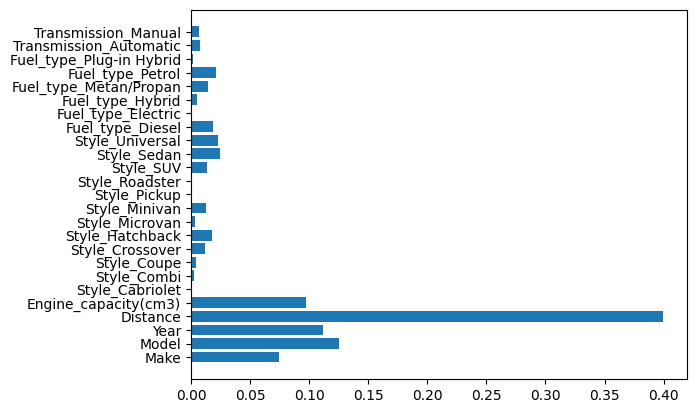

In [28]:
plt.barh(width=tree1.feature_importances_, y=X1.columns)

<BarContainer object of 25 artists>

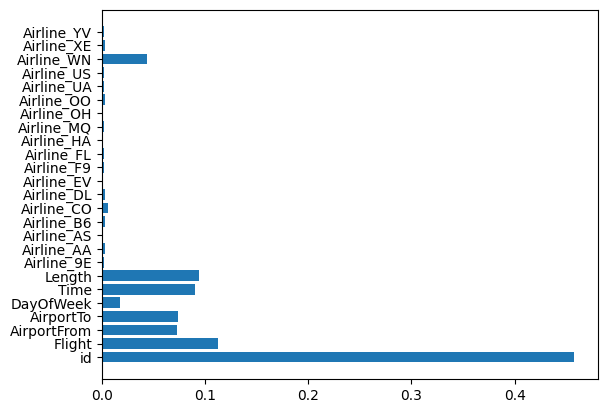

In [29]:
plt.barh(width=tree2.feature_importances_, y=X2.columns)

In [30]:
pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1, y1)
X1_pca.shape

(41007, 2)

In [7]:
pca2 = PCA(n_components=2)
X2_pca = pca2.fit_transform(X2, y2)
X2_pca.shape

(400000, 2)

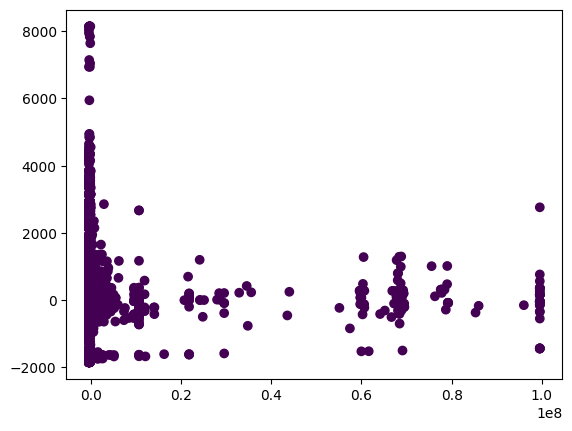

In [32]:
plt.scatter(X1_pca[:,0], X1_pca[:,1], c=y1)

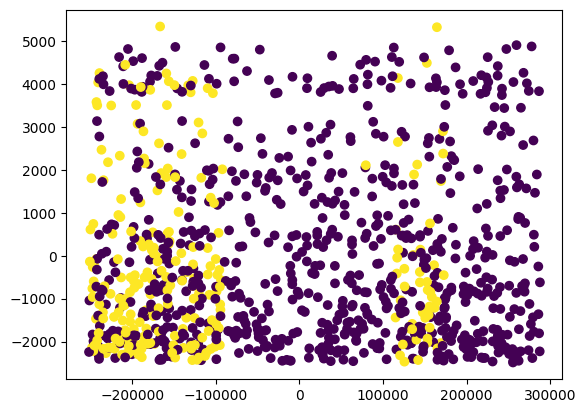

In [9]:
plt.scatter(X2_pca[:,0][:1000], X2_pca[:,1][:1000], c=y2[:1000])

In [34]:
test(X2_pca, y2)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     44806
           1       0.55      0.47      0.51     15194

    accuracy                           0.77     60000
   macro avg       0.69      0.67      0.68     60000
weighted avg       0.76      0.77      0.76     60000



In [11]:
tsne1 = TSNE(n_components=2)
X1_tsne = tsne1.fit_transform(X1_scaled[:1000])

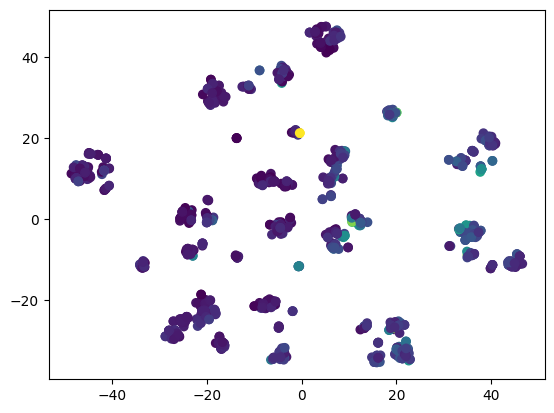

In [12]:
plt.scatter(X1_tsne[:,0], X1_tsne[:,1], c=y1[:1000]);

In [13]:
tsne2 = TSNE(n_components=2)
X2_tsne = tsne2.fit_transform(X2_scaled[:1000])

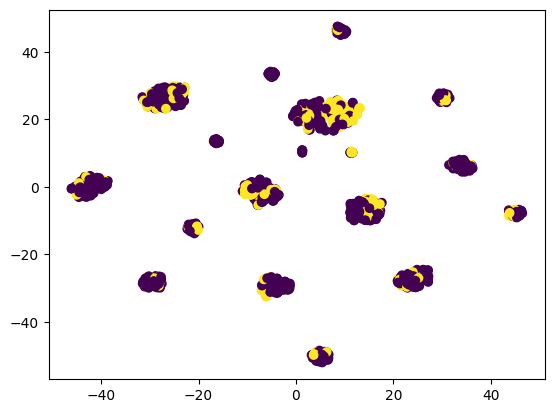

In [14]:
plt.scatter(X2_tsne[:,0], X2_tsne[:,1], c=y2[:1000]);

In [92]:
isomap1 = Isomap(n_components=2)
X1_isomap = isomap1.fit_transform(X1_scaled[:1000])

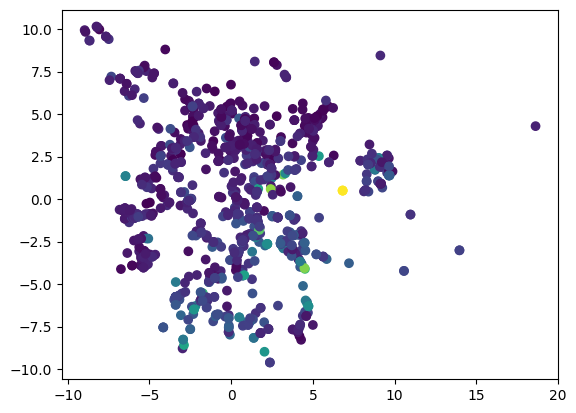

In [93]:
plt.scatter(X1_isomap[:,0], X1_isomap[:,1], c=y1[:1000])

In [94]:
isomap2 = Isomap(n_components=2)
X2_isomap = isomap2.fit_transform(X2_scaled[:1000])

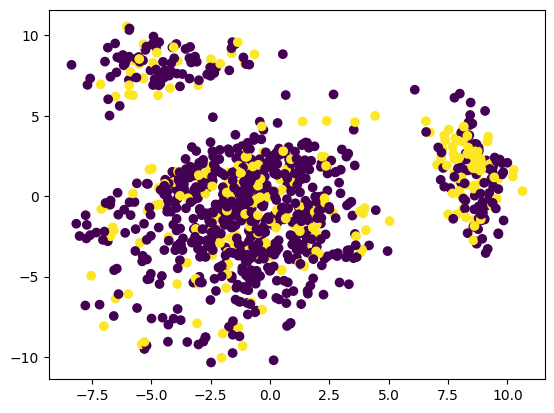

In [95]:
plt.scatter(X2_isomap[:,0], X2_isomap[:,1], c=y2[:1000])

In [46]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X1)

In [47]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1, test_size=0.2, random_state=42) 

In [48]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)

LinearRegression()

In [49]:
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

1.0217103906790435


In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42) 

In [51]:
clf = XGBClassifier().fit(X2_train, y2_train)

In [52]:
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     59774
           1       0.70      0.59      0.64     20226

    accuracy                           0.83     80000
   macro avg       0.78      0.75      0.76     80000
weighted avg       0.82      0.83      0.83     80000



In [53]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X1_vt)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

0.8218601146032317


In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_vt, y2, test_size=0.2, random_state=42) 
clf = XGBClassifier().fit(X2_train, y2_train)
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     59774
           1       0.64      0.12      0.21     20226

    accuracy                           0.76     80000
   macro avg       0.71      0.55      0.53     80000
weighted avg       0.74      0.76      0.69     80000



In [55]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X1_skb)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

0.7299429175056724


In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_skb, y2, test_size=0.2, random_state=42) 
clf = XGBClassifier().fit(X2_train, y2_train)
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     59774
           1       0.66      0.49      0.56     20226

    accuracy                           0.81     80000
   macro avg       0.75      0.70      0.72     80000
weighted avg       0.80      0.81      0.80     80000



In [57]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_rfe1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

0.9670272677111179


In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_rfe, y2, test_size=0.2, random_state=42) 
clf = XGBClassifier().fit(X2_train, y2_train)
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     59774
           1       0.65      0.56      0.60     20226

    accuracy                           0.81     80000
   macro avg       0.76      0.73      0.74     80000
weighted avg       0.81      0.81      0.81     80000



In [59]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X1_pca)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

1.862999953636693


In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_pca, y2, test_size=0.2, random_state=42) 
clf = XGBClassifier().fit(X2_train, y2_train)
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     59774
           1       0.60      0.50      0.55     20226

    accuracy                           0.79     80000
   macro avg       0.72      0.69      0.71     80000
weighted avg       0.78      0.79      0.78     80000



In [61]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X1_tsne)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

1.2905883281563981


In [62]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_tsne, y2, test_size=0.2, random_state=42) 
clf = XGBClassifier().fit(X2_train, y2_train)
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     59774
           1       0.71      0.34      0.46     20226

    accuracy                           0.80     80000
   macro avg       0.76      0.64      0.67     80000
weighted avg       0.78      0.80      0.77     80000



In [70]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X1_isomap)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y1[:1000], test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X1_train, y1_train)
print(mean_absolute_percentage_error(y1_test, lr.predict(X1_test)))

0.7809900430756475


In [71]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_isomap, y2[:1000], test_size=0.2, random_state=42) 
clf = XGBClassifier().fit(X2_train, y2_train)
print(classification_report(y2_test, clf.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       143
           1       0.36      0.18      0.24        57

    accuracy                           0.68       200
   macro avg       0.54      0.52      0.51       200
weighted avg       0.62      0.68      0.63       200



In [89]:
import sys
sys.path.insert(1, '..')
from models.PCA import PCA
from models.KMeans import KMeans
from models.LinearRegressionWithLasso import LinearRegressionWithLasso

In [80]:
pca = PCA(2)
X2_pca = pca.fit_transform(X2)

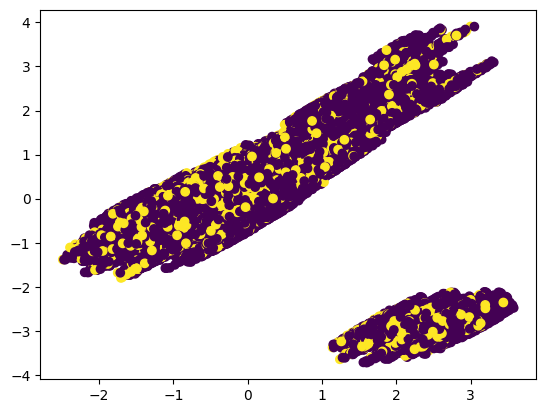

In [81]:
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=y2)

In [85]:
km = KMeans(2)
km.fit(X2_pca)

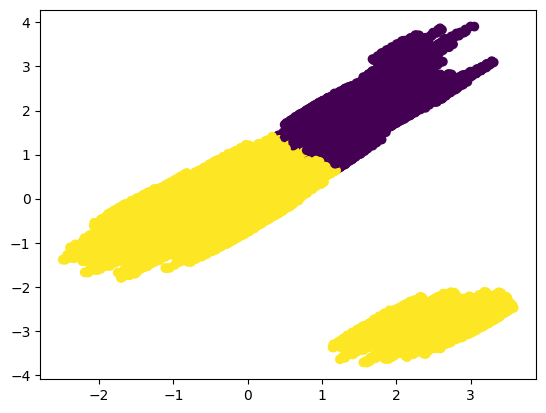

In [88]:
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=km.predict(X2_pca))

In [99]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)
lr = LinearRegressionWithLasso(0.1)
lr.fit(X1_train, y1_train)

In [100]:
y_pred = lr.predict(X1_test)

In [102]:
print(mean_absolute_percentage_error(y1_test, y_pred))

1.019042898908392


In [104]:
print('W: ', lr.w2)
print('b: ', lr.w1)

W:  [-481.44776377 -334.2705984  4240.10610487   -6.43671804 2335.62341525
  -27.18668993 -187.99272925  138.23991803  909.67712837 -838.08848229
  -95.39002336 -449.01137936  194.3413237    13.64948503 1033.3023517
  275.75416567 -798.91047516 -122.97907759  583.57159576  -25.76239285
 -684.50973039  407.20272783  295.27411781  598.66678869 -598.66678863]
b:  9765.823122251773
